29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


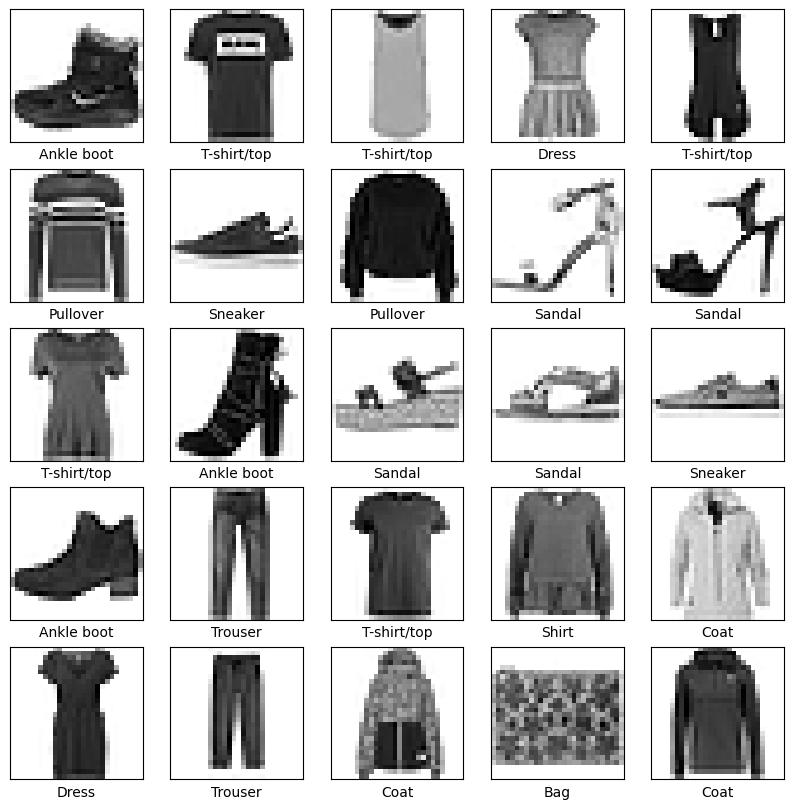

In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Cargar el dataset Fashion MNIST
(train_images_fm, train_labels_fm), (test_images_fm, test_labels_fm) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizar los datos (escala de 0 a 1)
train_images_fm, test_images_fm = train_images_fm / 255.0, test_images_fm / 255.0

# Nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Convertir los datos a DataFrames de Pandas
train_df = pd.DataFrame(train_images_fm.reshape(-1, 28*28))  # Cada fila es una imagen de 784 píxeles
train_df['label'] = train_labels_fm

test_df = pd.DataFrame(test_images_fm.reshape(-1, 28*28))
test_df['label'] = test_labels_fm

# Visualización de algunos ejemplos de entrenamiento
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_fm[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels_fm[i]])
plt.show()

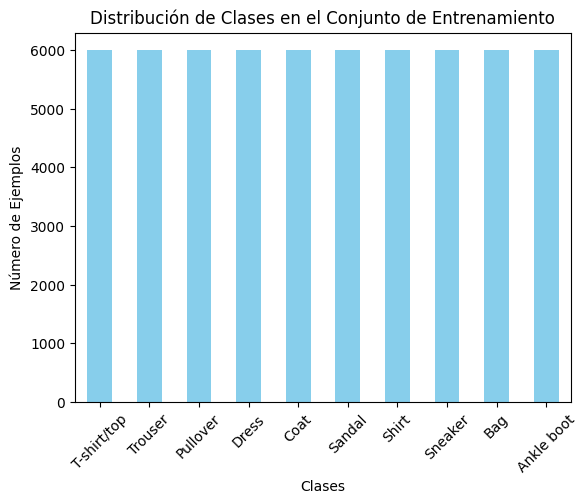

In [2]:

# Crear un DataFrame para las etiquetas
train_df = pd.DataFrame(train_labels_fm, columns=['label'])

# Contar la frecuencia de cada clase
class_distribution = train_df['label'].value_counts().sort_index()


# Visualizar la distribución de clases
class_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Clases')
plt.ylabel('Número de Ejemplos')
plt.title('Distribución de Clases en el Conjunto de Entrenamiento')
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.show()

In [3]:

# Construcción del modelo
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Convierte imágenes de 28x28 en vectores de 784
    layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas y activación ReLU
    layers.Dropout(0.2),                   # Regularización para evitar sobreajuste
    layers.Dense(10, activation='softmax') # Capa de salida para clasificar en 10 clases
])

# Compilación del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
train_images_fm [0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
predicciones = model.predict(train_images_fm)
predicciones

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step


array([[0.13311125, 0.13760953, 0.05561178, ..., 0.19723478, 0.06885198,
        0.10612036],
       [0.10391965, 0.28174102, 0.12547208, ..., 0.09914557, 0.03817264,
        0.04303301],
       [0.09316587, 0.16081357, 0.12290403, ..., 0.09634454, 0.09117685,
        0.09327159],
       ...,
       [0.06165542, 0.22524172, 0.0818283 , ..., 0.11403596, 0.07562245,
        0.05892017],
       [0.08174188, 0.12952466, 0.13662344, ..., 0.09948817, 0.09781924,
        0.08743268],
       [0.07916872, 0.11832263, 0.07892578, ..., 0.12604578, 0.10882494,
        0.08852594]], dtype=float32)

In [6]:
# Entrenar el modelo
history = model.fit(train_images_fm, train_labels_fm, epochs=10, validation_data=(test_images_fm, test_labels_fm))

# Evaluación en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_images_fm, test_labels_fm)
print(f"Precisión en datos de prueba: {test_accuracy*100:.2f}%")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7704 - loss: 0.6558 - val_accuracy: 0.8465 - val_loss: 0.4285
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8536 - loss: 0.4049 - val_accuracy: 0.8560 - val_loss: 0.4027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8657 - loss: 0.3710 - val_accuracy: 0.8645 - val_loss: 0.3774
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8737 - loss: 0.3439 - val_accuracy: 0.8689 - val_loss: 0.3654
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8776 - loss: 0.3317 - val_accuracy: 0.8648 - val_loss: 0.3712
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8837 - loss: 0.3136 - val_accuracy: 0.8710 - val_loss: 0.3586
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8867 - loss: 0.3067 - val_accuracy: 0.8781 - val_loss: 0.3419
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8879 - loss: 0.297

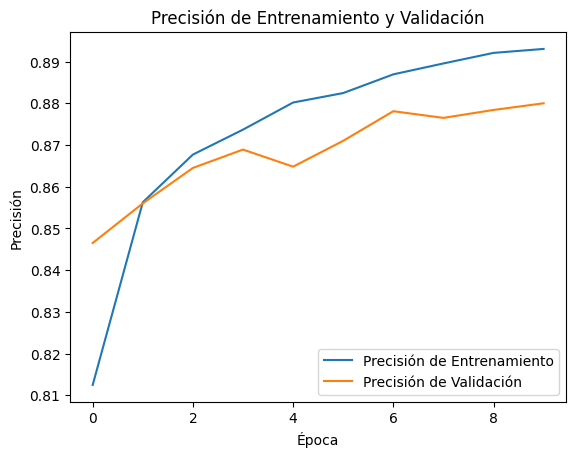

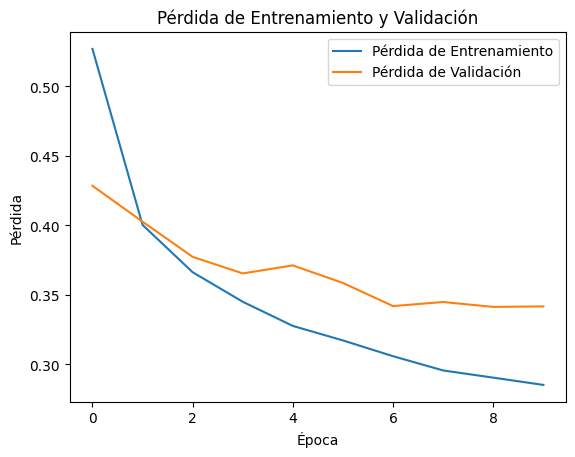

In [7]:


# Gráfico de precisión
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento') # Access the 'history' attribute of the History object
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.title('Precisión de Entrenamiento y Validación')
plt.show()

# Gráfico de pérdida
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.title('Pérdida de Entrenamiento y Validación')
plt.show()